## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

## Query for the data and create a numpy array

In [1]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database="training", port=5432, user='dot_student', password='qgis')

In [61]:
import pandas as pd
df = pd.read_sql("select * from winequality", conn)
df.head()

,b'fixed_acidity',b'volatile_acidity',b'citric_acid',b'residual_sugar',b'chlorides',b'free_sulfur_dioxide',b'total_sulfur_dioxide',b'density',b'ph',b'sulphates',b'alcohol',b'color'
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,W
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,W


In [8]:
import numpy as np
data = df.as_matrix()
len(data)

6497

## Split the data into features (x) and target (y, the last column in the table)

### Remember you can cast the results into an numpy array and then slice out what you want

In [28]:
lastColIndex = len(data[0])-1
x = [i[:lastColIndex] for i in data]
y = [i[lastColIndex] for i in data] # red or white

## Create a decision tree with the data

In [30]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Run 10-fold cross validation on the model

In [31]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(dt,x,y,cv=10)
scores

array([ 0.97846154,  0.98461538,  0.97692308,  0.98153846,  0.98153846,
        0.98      ,  0.97846154,  0.96923077,  0.98459168,  0.97839506])

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)

In [50]:
len(dt.feature_importances_)
column_names = list(df.columns)
column_names.pop(11)

b'color'

(0, 1)

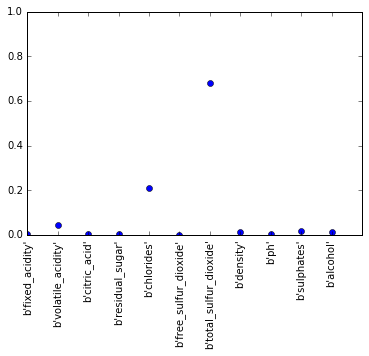

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(dt.feature_importances_, 'o')
plt.xticks(range(data.shape[1]),column_names, rotation=90)
plt.ylim(0,1)